In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle
import re
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [67]:
def tokenize(s):
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    out = regex.sub(' ', s).split()
    return out

def fit_logistic(x, y):
    y = y.values
    model = LogisticRegression(C=4, solver='saga')
    return model.fit(x, y)

In [68]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [69]:
PATH = "archive/labeled_data.csv"

In [70]:
df = pd.read_csv(PATH)
df.drop(['Unnamed: 0','count',],axis=1,inplace=True)


In [71]:
df

,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...
24778,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,0,6,0,1,youu got wild bitches tellin you lies


In [72]:
cls_names =["hate_speech","offensive_language","neither"]
df[cls_names]

,hate_speech,offensive_language,neither
0,0,0,3
1,0,3,0
2,0,3,0
3,0,2,1
4,0,6,0
...,...,...,...
24778,0,2,1
24779,0,1,2
24780,0,3,0
24781,0,6,0


In [73]:
scaler = MinMaxScaler()
scaler.fit_transform(df[cls_names])

array([[0.        , 0.        , 0.33333333],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.33333333, 0.        ],
       ...,
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.66666667, 0.        ],
       [0.        , 0.        , 0.33333333]])

In [114]:
for col in df[cls_names]:
    print(col,df[col].unique(), len(df[col].unique()))

hate_speech [0 1 2 3 4 6 5 7] 8
offensive_language [0 3 2 6 1 7 5 4 8 9] 10
neither [3 0 1 2 6 4 5 9 8 7] 10


In [115]:
 tfidfvectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                    tokenizer=tokenize,
                                    min_df=3,
                                    max_df=0.9,
                                    strip_accents='unicode',
                                    use_idf=1,
                                    smooth_idf=True,
                                    sublinear_tf=1)

In [116]:
df

,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...
24778,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,0,6,0,1,youu got wild bitches tellin you lies


C:\Users\xaidi\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

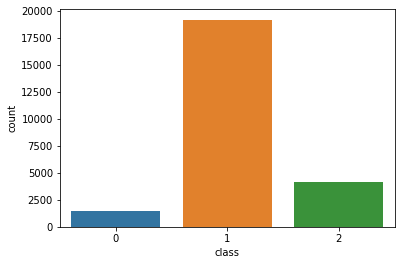

In [117]:
sns.countplot('class',data=df)

In [118]:
df

,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...
24778,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,0,6,0,1,youu got wild bitches tellin you lies


In [119]:
train_term_doc = tfidfvectorizer.fit_transform(df['tweet'])
x = train_term_doc

In [120]:
 with open('models/tfidf_vectorizer_train.pkl', 'wb') as tfidf_file:
        pickle.dump(tfidfvectorizer, tfidf_file)

In [121]:
df.columns.tolist()

['hate_speech', 'offensive_language', 'neither', 'class', 'tweet']

In [122]:
label_cols = ['hate_speech', 'offensive_language', 'neither','class']

In [123]:
print("Fit logistic regression for each class...")
for i, j in enumerate(label_cols):
    print("Fitting:", j)
    model = fit_logistic(x, df[j])

    # joblib.dump(model, 'models/logistic_{}.pkl'.format(j))
    with open('models/logistic_{}.pkl'.format(j), 'wb') as lg_file:
        pickle.dump(model, lg_file)

Fit logistic regression for each class...
Fitting: hate_speech
C:\Users\xaidi\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
Fitting: offensive_language
Fitting: neither
Fitting: class


In [124]:
x

<24783x26031 sparse matrix of type '<class 'numpy.float64'>'
	with 507566 stored elements in Compressed Sparse Row format>

In [125]:
fit_logistic?

Signature: fit_logistic(x, y)
Docstring: <no docstring>
File:      c:\users\xaidi\hate-speech-detection\<ipython-input-67-51047b82be22>
Type:      function


In [126]:
with open("models\logistic_hate_speech.pkl",'rb') as f:
    model_hate = pickle.load(f)

In [127]:
with open("models\logistic_offensive_language.pkl",'rb') as f:
    model_off_lang = pickle.load(f)

In [128]:
model_hate

LogisticRegression(C=4, solver='saga')

In [129]:
x = tfidfvectorizer.transform(df['tweet'][:10])

In [130]:
model_hate.predict(x)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [131]:
model_off_lang.predict(x)

array([0, 3, 3, 2, 3, 2, 3, 3, 3, 2], dtype=int64)